# K-Means vs. DBSCAN: Clustering Algorithms for Grouping Data


A Comprehensive Comparison of Two Popular Clustering Techniques in Machine Learning

# Introduction
Clustering is an essential task in data science that involves grouping similar data points into clusters. Among the many clustering algorithms available, K-Means and DBSCAN (Density-Based Spatial Clustering of Applications with Noise) are two of the most widely used techniques. Each of these algorithms excels in different scenarios and has distinct advantages and limitations. In this post, we’ll explore the key differences between K-Means and DBSCAN, explain how they work, and help you decide which algorithm to use for your data.

# What is K-Means Clustering?
K-Means is a popular partition-based clustering algorithm that divides data points into K distinct, non-overlapping clusters. The algorithm works by iteratively assigning each data point to the nearest cluster centroid and updating the centroids based on the mean of the assigned points. K-Means is widely used due to its simplicity and scalability for large datasets.

# How K-Means Works:
1. Choose K: Start by selecting the number of clusters ‘K’.
2. Initialize Centroids: Randomly place K centroids (one for each cluster) in the data space.
3. Assign Points to Clusters: Assign each data point to the nearest centroid based on Euclidean distance.
4. Update Centroids: Recalculate the centroids by taking the mean of all data points assigned to each cluster.
5. Repeat: Repeat the assignment and update steps until the centroids no longer change significantly (convergence).

# Mathematical Representation:
Given a set of data points X={x1,x2,…,xn}, K-Means aims to minimize the following objective function:
    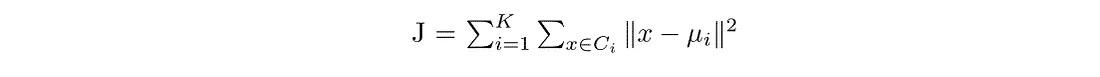

Where:

* ‘K’ is the number of clusters,
* ‘ Ci’ is the set of points in cluster ‘i’,
* ‘μi’​ is the centroid of cluster ‘i’,
* ‘∥x−μi∥²’ is the squared distance between point ‘x’ and the centroid ‘μi’.

# Advantages of K-Means:
*  Simplicity: Easy to implement and computationally efficient, making it suitable for large datasets.
* Scalability: K-Means performs well with a large number of data points and clusters.
* Interpretability: The algorithm is intuitive, and the results are easy to interpret visually, especially in 2D space.

# Limitations of K-Means:
* Predefined Number of Clusters: The number of clusters ‘K’ must be defined beforehand, which can be difficult to determine.
* Sensitivity to Outliers: K-Means is highly sensitive to outliers, as they can disproportionately affect the position of centroids.
* Non-Spherical Clusters: K-Means assumes clusters are spherical and evenly sized, making it ineffective for complex, irregularly shaped clusters.

In [1]:
#import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Load Data
data = pd.read_csv("Mall_Customers.csv")

data.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [11]:
data.shape

(200, 5)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [9]:
data.isnull().sum().sum()

np.int64(0)

In [ ]:
### Feature sleection for the model
#Considering only 2 features (Annual income and Spending Score) and no Label available
X= data.iloc[:, [3,4]].values

X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [19]:
#Building the Model
#KMeans Algorithm to decide the optimum cluster number , KMeans++ using Elbow Mmethod
#to figure out K for KMeans, I will use ELBOW Method on KMEANS++ Calculation

from sklearn.cluster import KMeans
wcss=[]

#we always assume the max number of cluster would be 10
#you can judge the number of clusters by doing averaging
###Static code to get max no of clusters

for i in range(1,11):
    Kmeans = KMeans(n_clusters=i, init="k-means++", random_state=0)
    Kmeans.fit(X)
    wcss.append(Kmeans.inertia_)

wcss

[269981.28,
 185917.14253928524,
 106348.37306211118,
 73679.78903948836,
 44448.45544793371,
 38858.9599751439,
 31969.426550235483,
 29858.483597603947,
 22209.85160802555,
 20786.93669205916]

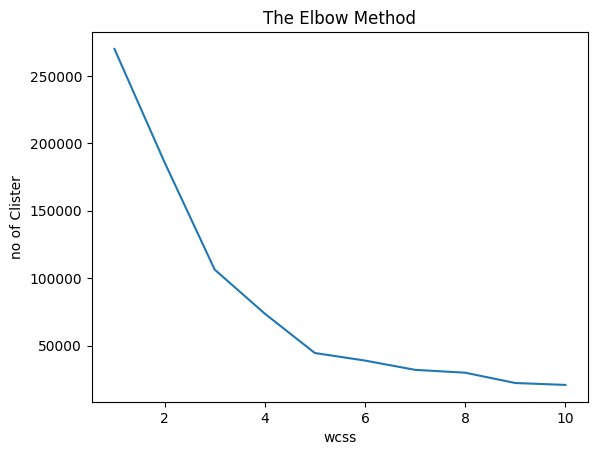

In [20]:
#Visualizing the ELBOW method to get the optimal value of K 
plt.plot(range(1,11),wcss)
plt.title("The Elbow Method")
plt.ylabel("no of Clister")
plt.xlabel("wcss")
plt.show()

In [23]:
#If you zoom out this curve then you will see that last elbow comes at k=5
#no matter what range we select ex- (1,21) also i will see the same behaviour but if we chose higher range it is little difficult to visualize the ELBOW
#that is why we usually prefer range (1,11)
##Finally we got that k=5

KmeansModel = KMeans(n_clusters=5, init='k-means++', random_state=0)
y_Kmeans = KmeansModel.fit_predict(X)

y_Kmeans
#If you zoom out this curve then you will see that last elbow comes at k=5
#no matter what range we select ex- (1,21) also i will see the same behaviour but if we chose higher range it is little difficult to visualize the ELBOW
#that is why we usually prefer range (1,11)
##Finally we got that k=5

array([3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 0,
       3, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 1, 2, 1, 2, 1,
       0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1], dtype=int32)

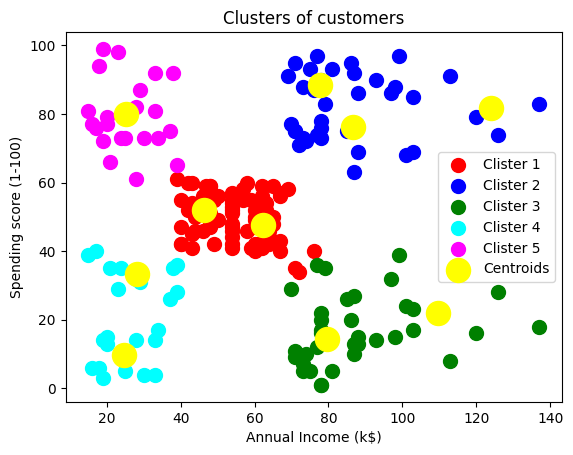

In [30]:
#Visualizing all the clusters 

plt.scatter(X[y_Kmeans == 0,0], X[y_Kmeans == 0,1], s=100 , c="red", label="Clister 1")
plt.scatter(X[y_Kmeans == 1,0], X[y_Kmeans == 1,1], s=100 , c="blue", label="Clister 2")
plt.scatter(X[y_Kmeans == 2,0], X[y_Kmeans == 2,1], s=100 , c="green", label="Clister 3")
plt.scatter(X[y_Kmeans == 3,0], X[y_Kmeans == 3,1], s=100 , c="cyan", label="Clister 4")
plt.scatter(X[y_Kmeans == 4,0], X[y_Kmeans == 4,1], s=100 , c="magenta", label="Clister 5")
plt.scatter(Kmeans.cluster_centers_[:,0], Kmeans.cluster_centers_[:,1], s=300, c="yellow", label="Centroids")
plt.title("Clusters of customers")
plt.ylabel("Spending score (1-100)")
plt.xlabel("Annual Income (k$)")
plt.legend()
plt.show()

### Model Interpretation 
    #Cluster 1 (Red Color) -> earning high but spending less
    #cluster 2 (Blue Colr) -> average in terms of earning and spending 
    #cluster 3 (Green Color) -> earning high and also spending high [TARGET SET]
    #cluster 4 (cyan Color) -> earning less but spending more
    #Cluster 5 (magenta Color) -> Earning less , spending less



## What is DBSCAN?

    DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is a density-based clustering algorithm that groups together data points that are closely packed (based on a distance metric), while marking points in low-density regions as noise. Unlike K-Means, DBSCAN does not require you to specify the number of clusters upfront and can handle clusters of arbitrary shapes.

# How DBSCAN Works:
1. Choose Parameters: Set the distance threshold ‘ε’ and the minimum number of points ‘MinPts’ required to form a dense region (core point).
2. Core Points and Neighborhoods: Identify core points that have at least ‘MinPts’ points within the ‘ε-radius’ neighborhood.
3. Cluster Formation: Form clusters by connecting core points and their neighbors.
4. Handle Noise: Any point that is not part of a core point’s neighborhood and cannot be assigned to any cluster is classified as noise.

# Mathematical Representation:
A point ‘p’ is core point if there are atleast ‘MinPts’ points within ‘ε-radius’ neighborhood of ‘p’. Formally, the neighborhood ‘N(p)’ of point ‘p’ is defined as:

   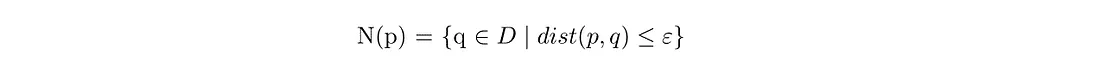

Where:

* ‘D’ is the dataset,
* ‘dist(p,q)’ is the distance between points ‘p’ and ‘q’,
* ‘ε’ is the maximum distance threshold.

# Advantages of DBSCAN:
* No Need for Predefined Clusters: DBSCAN can automatically determine the number of clusters based on the density of data points.
* Handles Noise and Outliers: DBSCAN can identify outliers as noise, making it robust to noisy data.
* Clusters of Arbitrary Shapes: DBSCAN can identify clusters of various shapes, not just spherical ones, making it versatile for complex datasets.

# Limitations of DBSCAN:
* Sensitive to Parameter Choice: The performance of DBSCAN heavily depends on the correct choice of ‘ε’ and ‘MinPts’. Inappropriate parameter selection can lead to poor results.
* Not Ideal for Varying Densities: DBSCAN struggles when clusters have varying densities, as it may merge dense and sparse regions into the same cluster.
* High-Dimensional Data: DBSCAN’s performance degrades in high-dimensional data because the concept of distance becomes less meaningful in higher dimensions (the curse of dimensionality).

In [ ]:
# import libraries
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler


In [ ]:
# Load Dataset
data = pd.read_csv("Mall_Customers.csv")
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
# ttach Cluster Labels
X = data[['Annual Income (k$)', 'Spending Score (1-100)']]
X.head()


,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [ ]:
# Feature Scaling
scaller = StandardScaler()

X_scaled = scaller.fit_transform(X)


In [ ]:
# Build DBSCAN Model

dbscan = DBSCAN(eps=0.3, min_samples=5)
clusters = dbscan.fit_predict(X_scaled)

clusters

# eps : Distance threshold to form clusters.
# min_samples : Minimum neighbors required to form dense region.

# 0,1,2… → cluster groups
# -1 → noise/outliers


array([ 2,  0,  1,  0,  2,  0,  1, -1,  1,  0, -1, -1, -1,  0,  1,  0,  2,
        0,  2, -1,  2,  0,  1,  0, -1, -1,  2, -1,  2, -1, -1,  0, -1, -1,
       -1, -1, -1,  0, -1,  0,  3, -1,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  4,  3,  4,  3,  4,  5,  4,  5,  4,  3,  4,  5,  4,
        5,  4,  5,  4,  5,  4,  3,  4,  5,  4,  3,  4,  5,  4,  5,  4,  5,
        4,  5,  4,  5,  4,  5,  4,  3,  4,  5,  4,  6,  4,  6,  4,  6, -1,
        6,  4,  6,  4,  6,  4,  6,  4,  6,  4, -1,  4,  6,  4, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

In [ ]:
# ttach Cluster Labels
data['DBSCAN_Cluster'] = clusters

data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),DBSCAN_Cluster
0,1,Male,19,15,39,2
1,2,Male,21,15,81,0
2,3,Female,20,16,6,1
3,4,Female,23,16,77,0
4,5,Female,31,17,40,2


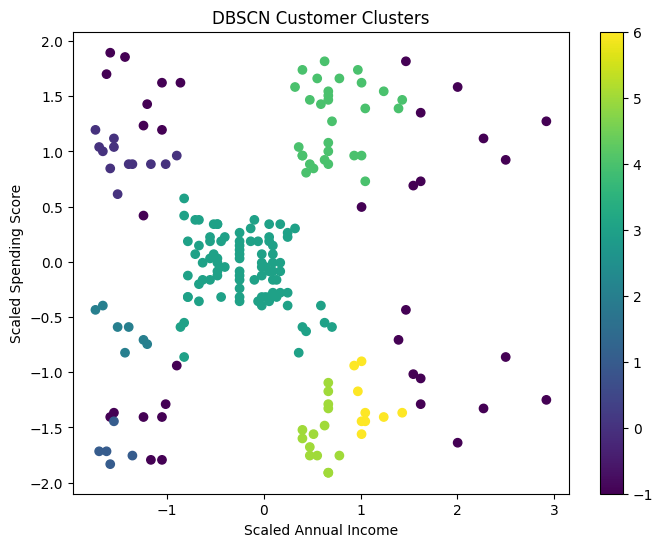

In [ ]:
# Visualize Clusters

plt.figure(figsize=(8,6))

scaller = plt.scatter(
    X_scaled[:,0],
    X_scaled[:,1],
    c=clusters,
    cmap='viridis'    
)

plt.title("DBSCN Customer Clusters")
plt.xlabel("Scaled Annual Income")
plt.ylabel("Scaled Spending Score")
plt.colorbar(scaller)
plt.show()

# Colors = customer groups
# Points far away = noise detection

In [47]:
# Analyze Cluster Counts
pd.Series(clusters).value_counts()

 3    88
-1    35
 4    30
 5    14
 0    12
 6     9
 2     7
 1     5
Name: count, dtype: int64

# Key Differences Between K-Means and DBSCAN

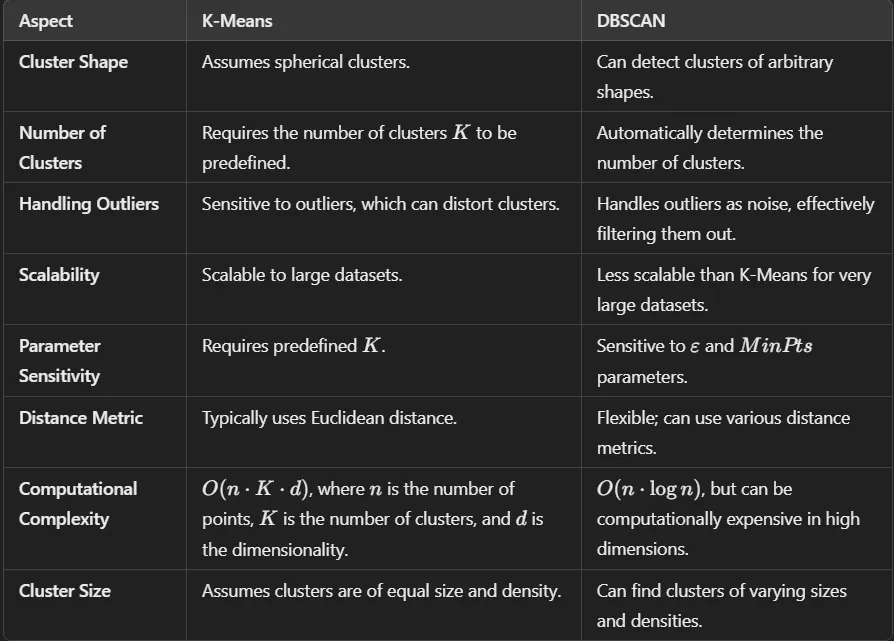

# When to Use K-Means vs. DBSCAN?

# Use K-Means if:
1. You Know the Number of Clusters: K-Means is a good choice when you already have an idea of how many clusters ‘K’ exist in the data.
2. The Data is Well-Separated: If the clusters are compact and well-separated in Euclidean space, K-Means can efficiently identify them.
3. You Have a Large Dataset: K-Means is computationally efficient and can handle large datasets quickly.

Example: A customer segmentation task where the dataset is large and consists of distinct, evenly distributed clusters would be ideal for K-Means clustering.

# Use DBSCAN if:
1. You Don’t Know the Number of Clusters: DBSCAN automatically identifies the number of clusters based on the density of the data, making it useful when you don’t have prior knowledge of ‘K’.
2. You Have Irregularly Shaped Clusters: DBSCAN excels at finding clusters that are non-spherical or complex in shape, such as clusters in spatial data.
3. You Want to Handle Outliers: If your dataset contains noise or outliers, DBSCAN can effectively separate noise from the dense regions of the data.

Example: In a geographical mapping application, where data points (e.g., earthquake epicenters) are scattered irregularly and outliers need to be identified, DBSCAN is an ideal choice.

# Advantages and Limitations of Each Algorithm

# K-Means Advantages:
* Simple and Fast: K-Means is straightforward to implement and runs efficiently on large datasets.
* Works Well for Spherical Clusters: For datasets where clusters are compact and evenly spaced, K-Means performs well.

# K-Means Limitations:
* Requires Predefined K: You need to know the number of clusters in advance, which can be challenging.
* Sensitive to Outliers: A few outliers can skew the centroids and lead to poor clustering results.
* Not Suitable for Non-Spherical Clusters: K-Means assumes clusters are spherical, so it struggles with irregularly shaped clusters.


# DBSCAN Advantages:
* Automatically Determines Clusters: No need to specify the number of clusters beforehand, as DBSCAN detects clusters based on density.
* Robust to Outliers: DBSCAN can identify noise points, which is particularly useful for noisy datasets.
* Finds Arbitrary-Shaped Clusters: DBSCAN is capable of identifying clusters with irregular shapes, unlike K-Means.

# DBSCAN Limitations:
* Sensitive to Parameters: DBSCAN’s success heavily depends on selecting the right values for ‘ε’ and ‘MinPts’, which can be difficult.
* Struggles with Varying Densities: DBSCAN can merge clusters with different densities into one or miss clusters with low densities.
* Not Scalable for Large Datasets: While DBSCAN can handle moderate-sized datasets, it becomes computationally expensive for very large datasets or high-dimensional data.

# Conclusion
    
    K-Means and DBSCAN are both powerful clustering algorithms, but they are suited for different types of data and use cases. K-Means is ideal for well-separated, spherical clusters and large datasets where you know the number of clusters in advance. DBSCAN, on the other hand, shines in detecting clusters of arbitrary shapes, handling noise, and not requiring you to specify the number of clusters beforehand.